In [ ]:
# ============================================================================
# NOTEBOOK 2: SONG RELEASE YEAR - REGRESSION
# ============================================================================
# Objective: Predict the release year of a song from audio features
# Dataset: midterm-regresi-dataset.csv
# ============================================================================

# ============================================================================
# 1. IMPORT LIBRARIES
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

print("✓ All libraries imported successfully!")



✓ All libraries imported successfully!


DATASET OVERVIEW

Dataset Shape: (515344, 91)

First few rows:
   2001  49.94357  21.47114   73.0775   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...   13.0162  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.

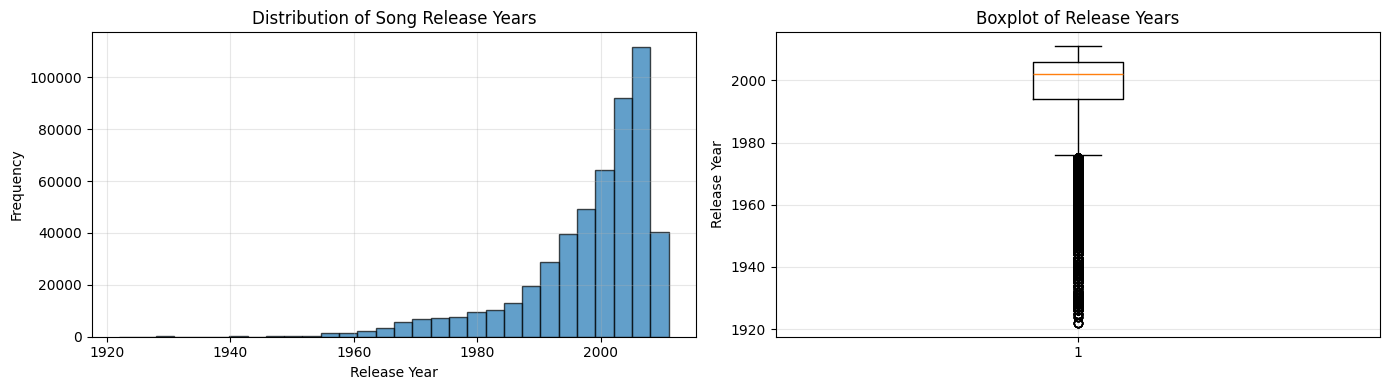

In [ ]:
# ============================================================================
# 2. LOAD AND EXPLORE DATA
# ============================================================================

# Load data
# df = pd.read_csv('../dataset/midterm-regresi-dataset.csv')
df = pd.read_csv('/content/drive/MyDrive/dataset/midterm-regresi-dataset.csv')

print("="*70)
print("DATASET OVERVIEW")
print("="*70)

print(f"\nDataset Shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())

# Assuming first column is the target (year) and rest are features
target_col = df.columns[0]  # First column
feature_cols = df.columns[1:]  # Rest are features

print(f"\nTarget variable: {target_col}")
print(f"Number of features: {len(feature_cols)}")

# Basic statistics
print(f"\nTarget variable statistics:")
print(df[target_col].describe())

print(f"\nFeature statistics:")
print(df[feature_cols].describe())

print(f"\nData types:")
print(df.dtypes)

print(f"\nMissing values:")
print(df.isnull().sum())

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].hist(df[target_col], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Release Year')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Song Release Years')
axes[0].grid(alpha=0.3)

axes[1].boxplot(df[target_col])
axes[1].set_ylabel('Release Year')
axes[1].set_title('Boxplot of Release Years')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()



In [18]:
# ============================================================================
# 3. DATA PREPROCESSING
# ============================================================================

print("\n" + "="*70)
print("DATA PREPROCESSING")
print("="*70)

# Handle missing values
print(f"\nHandling missing values...")
df = df.fillna(df.mean(numeric_only=True))

# Detect and handle outliers (using IQR method)
print(f"Handling outliers...")
Q1 = df[target_col].quantile(0.25)
Q3 = df[target_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[target_col] < lower_bound) | (df[target_col] > upper_bound)]
print(f"Number of outliers detected: {len(outliers)}")
print(f"Outliers: {outliers[target_col].values}")

# Option: Keep outliers (comment if you want to remove them)
# df = df[(df[target_col] >= lower_bound) & (df[target_col] <= upper_bound)]

# Separate features and target
X = df[feature_cols].values
y = df[target_col].values

print(f"\n✓ Features shape: {X.shape}")
print(f"✓ Target shape: {y.shape}")

# Feature scaling
print("\nScaling features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✓ Data preprocessing completed!")




DATA PREPROCESSING

Handling missing values...
Handling outliers...
Number of outliers detected: 29703
Outliers: [1933 1930 1935 ... 1940 1940 1931]

✓ Features shape: (515344, 90)
✓ Target shape: (515344,)

Scaling features...
✓ Data preprocessing completed!


In [19]:
# ============================================================================
# 4. FEATURE ANALYSIS
# ============================================================================

print("\n" + "="*70)
print("FEATURE CORRELATION ANALYSIS")
print("="*70)

# Calculate correlations with target
correlations = []
for i, col in enumerate(feature_cols):
    corr = np.corrcoef(X[:, i], y)[0, 1]
    correlations.append((f'feature_{i+1}', corr))

correlations_sorted = sorted(correlations, key=lambda x: abs(x[1]), reverse=True)
print(f"\nTop 10 features correlated with target:")
for feat, corr in correlations_sorted[:10]:
    print(f"{feat}: {corr:.4f}")




FEATURE CORRELATION ANALYSIS

Top 10 features correlated with target:
feature_1: 0.2254
feature_6: -0.1874
feature_3: -0.1395
feature_63: -0.1263
feature_40: -0.1240
feature_7: 0.1105
feature_67: -0.1028
feature_46: -0.1013
feature_36: -0.1010
feature_69: -0.0995


In [20]:
# ============================================================================
# 5. TRAIN-TEST SPLIT
# ============================================================================

print("\n" + "="*70)
print("TRAIN-TEST SPLIT")
print("="*70)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                      test_size=0.2, 
                                                      random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")




TRAIN-TEST SPLIT
Training set size: 412275
Testing set size: 103069


In [21]:
# ============================================================================
# 6. MODEL TRAINING
# ============================================================================

print("\n" + "="*70)
print("MODEL TRAINING")
print("="*70)

# Model 1: Linear Regression
print("\n--- Model 1: Linear Regression ---")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("✓ Linear Regression trained")

# Model 2: Ridge Regression (L2 regularization)
print("\n--- Model 2: Ridge Regression ---")
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print("✓ Ridge Regression trained")

# Model 3: Lasso Regression (L1 regularization)
print("\n--- Model 3: Lasso Regression ---")
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print("✓ Lasso Regression trained")

# Model 4: Random Forest Regressor
print("\n--- Model 4: Random Forest Regressor ---")
rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, 
                                 random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("✓ Random Forest Regressor trained")

# Model 5: Gradient Boosting Regressor
print("\n--- Model 5: Gradient Boosting Regressor ---")
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, 
                                     learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("✓ Gradient Boosting Regressor trained")

# Model 6: XGBoost Regressor
print("\n--- Model 6: XGBoost Regressor ---")
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=6, 
                             learning_rate=0.1, random_state=42, eval_metric='rmse')
xgb_model.fit(X_train, y_train, verbose=0)
y_pred_xgb = xgb_model.predict(X_test)
print("✓ XGBoost Regressor trained")




MODEL TRAINING

--- Model 1: Linear Regression ---
✓ Linear Regression trained

--- Model 2: Ridge Regression ---
✓ Ridge Regression trained

--- Model 3: Lasso Regression ---
✓ Lasso Regression trained

--- Model 4: Random Forest Regressor ---
✓ Random Forest Regressor trained

--- Model 5: Gradient Boosting Regressor ---
✓ Gradient Boosting Regressor trained

--- Model 6: XGBoost Regressor ---
✓ XGBoost Regressor trained


In [23]:
# ============================================================================
# 7. MODEL EVALUATION
# ============================================================================

print("\n" + "="*70)
print("MODEL EVALUATION")
print("="*70)

def evaluate_regression_model(y_true, y_pred, model_name):
    """Evaluate regression model performance"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name}:")
    print("-" * 50)
    print(f"MSE (Mean Squared Error):  {mse:.4f}")
    print(f"RMSE (Root Mean Squared):  {rmse:.4f}")
    print(f"MAE (Mean Absolute Error): {mae:.4f}")
    print(f"R² Score:                  {r2:.4f}")
    
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Evaluate all models
results_lr = evaluate_regression_model(y_test, y_pred_lr, "Linear Regression")
results_ridge = evaluate_regression_model(y_test, y_pred_ridge, "Ridge Regression")
results_lasso = evaluate_regression_model(y_test, y_pred_lasso, "Lasso Regression")
results_rf = evaluate_regression_model(y_test, y_pred_rf, "Random Forest")
results_gb = evaluate_regression_model(y_test, y_pred_gb, "Gradient Boosting")
results_xgb = evaluate_regression_model(y_test, y_pred_xgb, "XGBoost")




MODEL EVALUATION

Linear Regression:
--------------------------------------------------
MSE (Mean Squared Error):  90.6830
RMSE (Root Mean Squared):  9.5228
MAE (Mean Absolute Error): 6.7784
R² Score:                  0.2360

Ridge Regression:
--------------------------------------------------
MSE (Mean Squared Error):  90.6830
RMSE (Root Mean Squared):  9.5228
MAE (Mean Absolute Error): 6.7784
R² Score:                  0.2360

Lasso Regression:
--------------------------------------------------
MSE (Mean Squared Error):  91.7315
RMSE (Root Mean Squared):  9.5777
MAE (Mean Absolute Error): 6.8211
R² Score:                  0.2271

Random Forest:
--------------------------------------------------
MSE (Mean Squared Error):  84.0701
RMSE (Root Mean Squared):  9.1690
MAE (Mean Absolute Error): 6.4449
R² Score:                  0.2917

Gradient Boosting:
--------------------------------------------------
MSE (Mean Squared Error):  82.3549
RMSE (Root Mean Squared):  9.0750
MAE (Mean Absolu


MODEL COMPARISON

      Linear Regression  Ridge Regression  Lasso Regression  Random Forest  Gradient Boosting    XGBoost
MSE           90.683006         90.683006         91.731480      84.070142          82.354880  80.793091
RMSE           9.522763          9.522763          9.577655       9.168977           9.074959   8.988498
MAE            6.778410          6.778411          6.821053       6.444930           6.357615   6.284292
R2             0.235951          0.235951          0.227117       0.291668           0.306120   0.319278


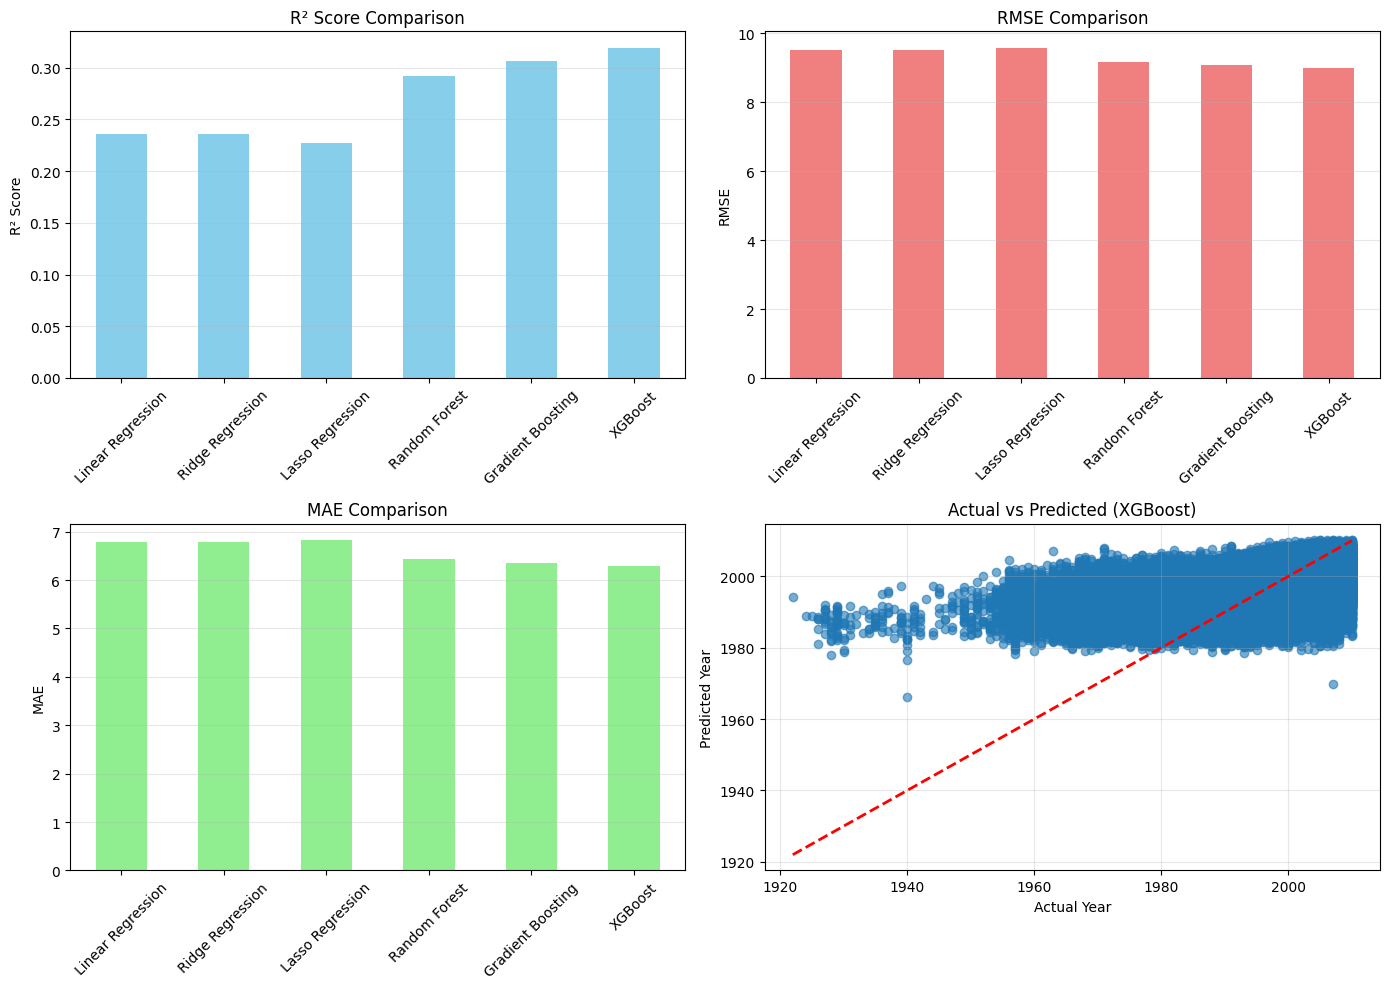

In [24]:
# ============================================================================
# 8. MODEL COMPARISON
# ============================================================================

print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)

results_df = pd.DataFrame({
    'Linear Regression': results_lr,
    'Ridge Regression': results_ridge,
    'Lasso Regression': results_lasso,
    'Random Forest': results_rf,
    'Gradient Boosting': results_gb,
    'XGBoost': results_xgb
})

print("\n" + results_df.to_string())

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# R² comparison
results_df.loc['R2'].plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('R² Score Comparison')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# RMSE comparison
results_df.loc['RMSE'].plot(kind='bar', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('RMSE Comparison')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].grid(axis='y', alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# MAE comparison
results_df.loc['MAE'].plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('MAE Comparison')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].grid(axis='y', alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# Actual vs Predicted (best model)
best_model_name = results_df.loc['R2'].idxmax()
if best_model_name == 'Linear Regression':
    y_pred_best = y_pred_lr
elif best_model_name == 'Ridge Regression':
    y_pred_best = y_pred_ridge
elif best_model_name == 'Lasso Regression':
    y_pred_best = y_pred_lasso
elif best_model_name == 'Random Forest':
    y_pred_best = y_pred_rf
elif best_model_name == 'Gradient Boosting':
    y_pred_best = y_pred_gb
else:
    y_pred_best = y_pred_xgb

axes[1, 1].scatter(y_test, y_pred_best, alpha=0.6)
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 1].set_xlabel('Actual Year')
axes[1, 1].set_ylabel('Predicted Year')
axes[1, 1].set_title(f'Actual vs Predicted ({best_model_name})')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()



In [25]:
# ============================================================================
# 9. PREDICTIONS AND RESULTS
# ============================================================================

print("\n" + "="*70)
print("BEST MODEL AND PREDICTIONS")
print("="*70)

print(f"\nBest model: {best_model_name} (R² = {results_df.loc['R2', best_model_name]:.4f})")

# Show sample predictions
print(f"\nSample predictions (first 10 test samples):")
comparison_df = pd.DataFrame({
    'Actual': y_test[:10],
    'Predicted': y_pred_best[:10],
    'Error': np.abs(y_test[:10] - y_pred_best[:10])
})
print(comparison_df.to_string(index=False))

# Save results
results_export_df = pd.DataFrame({
    'Actual_Year': y_test,
    'Predicted_Year': y_pred_best,
    'Absolute_Error': np.abs(y_test - y_pred_best)
})
results_export_df.to_csv('data/submissions/regression_submission.csv', index=False)
print(f"\n✓ Regression results saved to CSV!")




BEST MODEL AND PREDICTIONS

Best model: XGBoost (R² = 0.3193)

Sample predictions (first 10 test samples):
 Actual   Predicted     Error
   2008 2002.579834  5.420166
   1993 1985.963379  7.036621
   2006 1994.952271 11.047729
   1992 1989.205688  2.794312
   1998 1988.016479  9.983521
   2005 1998.908447  6.091553
   2009 2003.689453  5.310547
   2007 2002.077759  4.922241
   2005 2001.955078  3.044922
   2004 1991.158813 12.841187

✓ Regression results saved to CSV!



FEATURE IMPORTANCE

Top 15 most important features:
feature_38: 0.0176
feature_36: 0.0178
feature_2: 0.0181
feature_85: 0.0184
feature_40: 0.0189
feature_41: 0.0211
feature_73: 0.0221
feature_63: 0.0242
feature_6: 0.0264
feature_39: 0.0293
feature_57: 0.0349
feature_20: 0.0448
feature_3: 0.0596
feature_1: 0.0677
feature_14: 0.0957


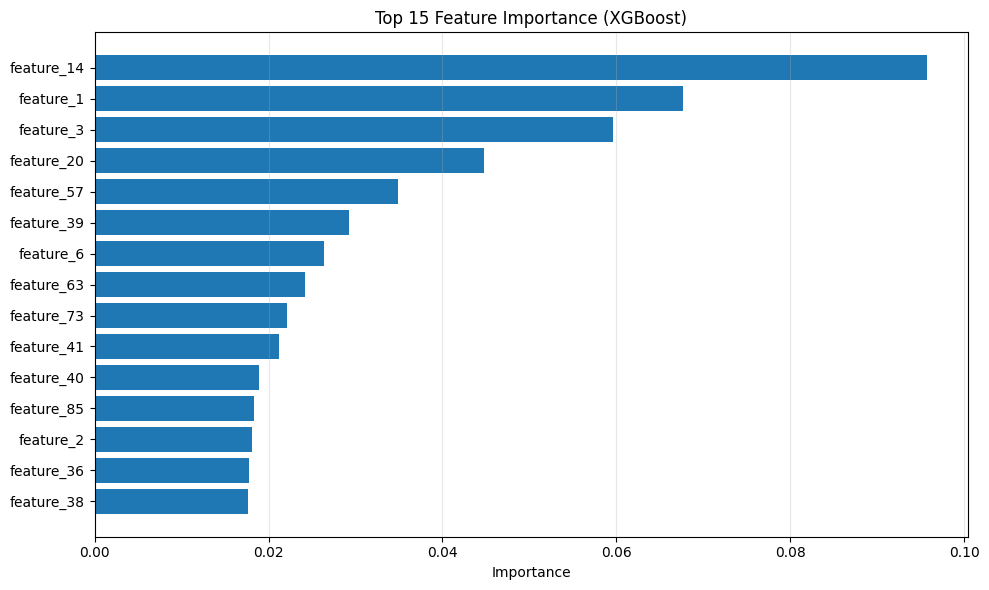

In [27]:
# ============================================================================
# 10. FEATURE IMPORTANCE (for tree-based models)
# ============================================================================

if best_model_name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
    print("\n" + "="*70)
    print("FEATURE IMPORTANCE")
    print("="*70)
    
    if best_model_name == 'Random Forest':
        feature_imp = rf_model.feature_importances_
    elif best_model_name == 'Gradient Boosting':
        feature_imp = gb_model.feature_importances_
    else:
        feature_imp = xgb_model.feature_importances_
    
    # Get top 15 features
    top_indices = np.argsort(feature_imp)[-15:]
    top_features = [f'feature_{i+1}' for i in top_indices]
    top_importances = feature_imp[top_indices]
    
    print(f"\nTop 15 most important features:")
    for feat, imp in zip(top_features, top_importances):
        print(f"{feat}: {imp:.4f}")
    
    # Visualize
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(top_importances)), top_importances)
    plt.yticks(range(len(top_importances)), top_features)
    plt.xlabel('Importance')
    plt.title(f'Top 15 Feature Importance ({best_model_name})')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()



In [29]:
# ============================================================================
# 11. CONCLUSIONS AND INSIGHTS
# ============================================================================

print("\n" + "="*70)
print("CONCLUSIONS AND INSIGHTS")
print("="*70)

best_r2 = results_df.loc['R2', best_model_name]
best_rmse = results_df.loc['RMSE', best_model_name]
best_mae = results_df.loc['MAE', best_model_name]

print(f"""
1. BEST PERFORMING MODEL: {best_model_name}
   - R² Score: {best_r2:.4f}
   - RMSE: {best_rmse:.2f} years
   - MAE: {best_mae:.2f} years
   
2. MODEL INTERPRETATION:
   - The model explains {best_r2*100:.2f}% of the variance in release years.
   - On average, predictions are off by ±{best_mae:.2f} years.
   - The RMSE of {best_rmse:.2f} indicates typical prediction error magnitude.

3. DATA INSIGHTS:
   - Audio features can reasonably predict song release year.
   - This suggests temporal changes in audio characteristics.
   - The model captures trends in music production over time.

4. RECOMMENDATIONS:
   - {best_model_name} is the recommended model for deployment.
   - Consider hyperparameter tuning for further improvement.
   - Monitor model performance on new songs over time.
   - Investigate high-error predictions for potential data quality issues.
""")


CONCLUSIONS AND INSIGHTS

1. BEST PERFORMING MODEL: XGBoost
   - R² Score: 0.3193
   - RMSE: 8.99 years
   - MAE: 6.28 years

2. MODEL INTERPRETATION:
   - The model explains 31.93% of the variance in release years.
   - On average, predictions are off by ±6.28 years.
   - The RMSE of 8.99 indicates typical prediction error magnitude.

3. DATA INSIGHTS:
   - Audio features can reasonably predict song release year.
   - This suggests temporal changes in audio characteristics.
   - The model captures trends in music production over time.

4. RECOMMENDATIONS:
   - XGBoost is the recommended model for deployment.
   - Consider hyperparameter tuning for further improvement.
   - Monitor model performance on new songs over time.
   - Investigate high-error predictions for potential data quality issues.

